In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# visualizing a simple network

G = nx.Graph()
G.add_edge('a','b')
G.add_edge('a','c')
G.add_edge('a','d')
G.add_edge('a','e')
G.add_edge('b','c')
G.add_edge('b','d')
G.add_edge('b','e')
G.add_edge('e','c')

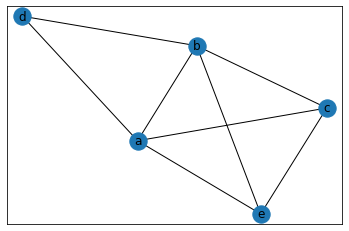

In [4]:
nx.draw_networkx(G)

In [5]:
nx.average_clustering(G)

0.8666666666666666

In [6]:
nx.eigenvector_centrality(G)

{'a': 0.5100364187624349,
 'b': 0.5100364187624349,
 'c': 0.43904190094642953,
 'd': 0.3069366734339046,
 'e': 0.43904190094642953}

In [7]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 8
Average degree:   3.2000


In [8]:
data = pd.read_csv('amazon-reviews.csv')
data.head()
print(type(data))
df = pd.DataFrame(data, columns = ['reviewerID', 'asin', 'Title', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime'])

<class 'pandas.core.frame.DataFrame'>


In [9]:
df.head()

,reviewerID,asin,Title,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A15Q7ABIU9O9YZ,60554800,Red Tide,Larry Scantlebury,"[2,3]",This is my first GM Ford book and I will read ...,3,"Let's keep it real, not personal",1127606400,"09 25, 2005"
1,AUIJDXNYVTEA8,60554800,Red Tide,Les Stockton,"[0,2]",I liked the story. I thought the book added a...,4,I liked it,1361923200,"02 27, 2013"
2,A20N5GOON55TE9,60554800,Red Tide,lila,"[0,2]","As always, G.M. Ford does not disappoint. I st...",5,Good reading,1366761600,"04 24, 2013"
3,A1CT8ENDZSYTX3,60554800,Red Tide,Lisa B.,"[1,2]",I love Ford's Leo Waterman series and the firs...,3,Science Fiction or Mystery?,1122249600,"07 25, 2005"
4,A2SI6BNK5SWSMD,60554800,Red Tide,L. J. Roberts,"[2,2]",It was nice to see Corso working with the poli...,3,3.5 stars - Needed a better end.,1113004800,"04 9, 2005"


In [10]:
#unweighted graph (visualization)

G = nx.Graph() 
for i in range(len(df)):
    for j in range(len(df)):
        if i!=j and df['Title'][i] == df['Title'][j]:
            G.add_edge(i,j)

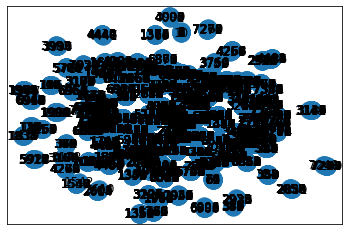

In [11]:
nx.draw_networkx(G)
plt.savefig("path.jpg")

In [12]:
#weighted graph


# creating a multigraph able to contain multiple edges between nodes, 
# weight between edges being the mean of user ratings given by both

GW = nx.MultiGraph() 
for i in range(len(df)):
    for j in range(len(df)):
        if i!=j and df['Title'][i] == df['Title'][j]:
            GW.add_edge(df['reviewerID'][i],df['reviewerID'][j], weight = (int)(df['overall'][i]+df['overall'][j])/2)

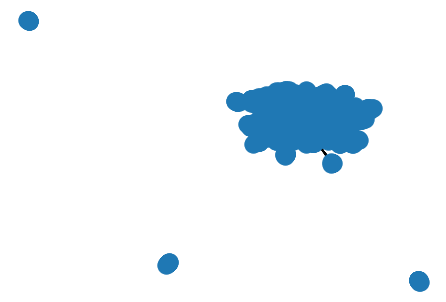

In [20]:
# visualizing network with degree
nx.draw(GW)
plt.savefig("gw_path.jpg")

In [21]:
print(nx.info(GW)) # same node for repeated user
print(nx.info(G)) # different node for repeated user

Name: 
Type: MultiGraph
Number of nodes: 5630
Number of edges: 1181258
Average degree: 419.6298
Name: 
Type: Graph
Number of nodes: 7338
Number of edges: 590629
Average degree: 160.9782


In [22]:
max_node_list = sorted(GW.degree, key=lambda x: x[1], reverse=True)
max_node_list[:10]

[('AFVQZQ8PW0L', 6828),
 ('A1X8VZWTOG8IS6', 4052),
 ('A1M4NJYP0WNL8Q', 3570),
 ('A3H2CKTFZ3B3GD', 3446),
 ('A2NHD7LUXVGTD3', 3224),
 ('ABMX8XUNPR3LP', 2840),
 ('A2MPXQB68PGSM8', 2772),
 ('A3RTNA9THAU2OP', 2772),
 ('A2F6N60Z96CAJI', 2762),
 ('A2ZATPER188K3J', 2732)]

In [42]:
print(max_node_list[-1])
max_node_list_unweighted = sorted(G.degree, key = lambda x: x[1], reverse=True)
print(max_node_list_unweighted[-1])

('A1W0Z6DWSQAFHN', 18)
(6445, 9)


(-1.0789565235376357,
 1.0989979296922683,
 -1.0322396516799928,
 1.0445556402206422)

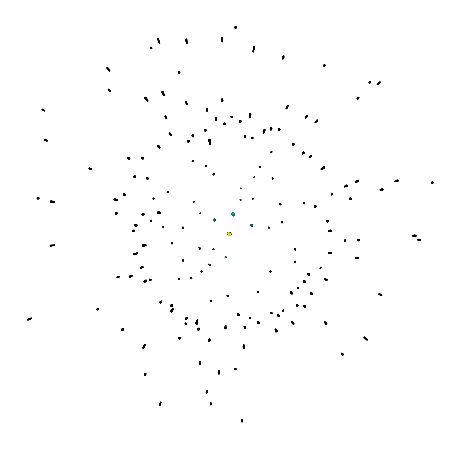

In [24]:
# visualizing network by betweenness centrality

pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [200.0 * G.degree(v) for v in G]
node_size =  [v * 100 for v in betCent.values()]
plt.figure(figsize=(8,8))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [25]:
nx.average_clustering(G)

1.0

In [27]:
forward_dict = nx.triangles(G)
dict(sorted(forward_dict.items(), key=lambda item: item[1]))

{116: 36,
 117: 36,
 118: 36,
 119: 36,
 120: 36,
 121: 36,
 122: 36,
 123: 36,
 124: 36,
 125: 36,
 378: 36,
 379: 36,
 380: 36,
 381: 36,
 382: 36,
 383: 36,
 384: 36,
 385: 36,
 386: 36,
 387: 36,
 1830: 36,
 1831: 36,
 1832: 36,
 1833: 36,
 1834: 36,
 1835: 36,
 1836: 36,
 1837: 36,
 1838: 36,
 1839: 36,
 2849: 36,
 2850: 36,
 2851: 36,
 2852: 36,
 2853: 36,
 2854: 36,
 2855: 36,
 2856: 36,
 2857: 36,
 2858: 36,
 3989: 36,
 3990: 36,
 3991: 36,
 3992: 36,
 3993: 36,
 3994: 36,
 3995: 36,
 3996: 36,
 3997: 36,
 3998: 36,
 3999: 36,
 4000: 36,
 4001: 36,
 4002: 36,
 4003: 36,
 4004: 36,
 4005: 36,
 4006: 36,
 4007: 36,
 4008: 36,
 4279: 36,
 4280: 36,
 4281: 36,
 4282: 36,
 4283: 36,
 4284: 36,
 4285: 36,
 4286: 36,
 4287: 36,
 4288: 36,
 4439: 36,
 4440: 36,
 4441: 36,
 4442: 36,
 4443: 36,
 4444: 36,
 4445: 36,
 4446: 36,
 4447: 36,
 4448: 36,
 5913: 36,
 5914: 36,
 5915: 36,
 5916: 36,
 5917: 36,
 5918: 36,
 5919: 36,
 5920: 36,
 5921: 36,
 5922: 36,
 6436: 36,
 6437: 36,
 6438: 3

In [33]:
pr = nx.pagerank_numpy(G) # will return dict of user node page ranks
print(pr)

{0: 0.00013627691468828248, 1: 0.0001362769146878562, 2: 0.00013627691468829113, 3: 0.00013627691468783622, 4: 0.00013627691468783622, 5: 0.00013627691468783622, 6: 0.00013627691468783622, 7: 0.00013627691468783622, 8: 0.00013627691468783622, 9: 0.00013627691468783622, 10: 0.00013627691468783622, 11: 0.00013627691469048753, 12: 0.00013627691469048753, 13: 0.00013627691469048753, 14: 0.00013627691469048753, 15: 0.00013627691469048753, 16: 0.00013627691469048753, 17: 0.00013627691469048753, 18: 0.00013627691469048753, 19: 0.00013627691469048753, 20: 0.00013627691469048753, 21: 0.00013627691469048753, 22: 0.00013627691469048753, 23: 0.00013627691469048753, 24: 0.00013627691469048753, 25: 0.00013627691469048753, 26: 0.00013627691469048753, 27: 0.00013627691469048753, 28: 0.00013627691469048753, 29: 0.00013627691469048753, 30: 0.00013627691469048753, 31: 0.00013627691469048753, 32: 0.00013627691469048753, 33: 0.00013627691469048753, 34: 0.00013627691469048753, 35: 0.00013627691469048753, 36

In [32]:
gm = nx.google_matrix(GW, alpha = 0.89)
print(gm)

[[1.95381883e-05 6.00992280e-03 1.54233843e-02 ... 1.95381883e-05
  1.95381883e-05 1.95381883e-05]
 [7.98913331e-02 1.95381883e-05 1.02711846e-01 ... 1.95381883e-05
  1.95381883e-05 1.95381883e-05]
 [5.34195382e-02 2.67195382e-02 1.95381883e-05 ... 1.95381883e-05
  1.95381883e-05 1.95381883e-05]
 ...
 [1.95381883e-05 1.95381883e-05 1.95381883e-05 ... 1.95381883e-05
  1.62341131e-02 1.80357325e-02]
 [1.95381883e-05 1.95381883e-05 1.95381883e-05 ... 1.81008023e-02
  1.95381883e-05 1.81008023e-02]
 [1.95381883e-05 1.95381883e-05 1.95381883e-05 ... 1.80357325e-02
  1.62341131e-02 1.95381883e-05]]


In [36]:
# finding min page rank nodes from graph
minval = min(pr.values())
res = [k for k, v in pr.items() if v==minval]
print(res)

[3, 4, 5, 6, 7, 8, 9, 10]


In [52]:
# irrelevant users (based on page rank scores) ->
irrelevant_users = df[3:11]
print(irrelevant_users)

        reviewerID      asin     Title                       reviewerName  \
3   A1CT8ENDZSYTX3  60554800  Red Tide                            Lisa B.   
4   A2SI6BNK5SWSMD  60554800  Red Tide                      L. J. Roberts   
5   A1SSYYL2WTAK4Y  60554800  Red Tide                            Mtnhi 5   
6    AVZ1LIW6EUQIK  60554800  Red Tide        Robert J. Unger "Dr. Gates"   
7   A3QJQQZTKFV7BJ  60554800  Red Tide                     Sandy "WR Gma"   
8   A3OMPCA27U6WL2  60554800  Red Tide                        Teri Tipton   
9   A31WHFXF6T06DR  60554800  Red Tide  Watson McFestus "Watson McFestus"   
10  A13HLAGY514ICM  60554800  Red Tide                 William W. Mouroux   

   helpful                                         reviewText  overall  \
3    [1,2]  I love Ford's Leo Waterman series and the firs...        3   
4    [2,2]  It was nice to see Corso working with the poli...        3   
5    [0,0]  Bet you can't put this one down. Ford's writin...        5   
6    [0,2]

In [39]:
prw = nx.pagerank_numpy(GW)
minvalw = min(prw.values())
resw = [k for k, v in prw.items() if v==minvalw]
print(resw) # min page rank nodes in weighted, multi graph

['A1RREZ3HGOVT4D', 'A32Y55Z00QI12S']


In [43]:
GW.degree('A1RREZ3HGOVT4D') # degree of min page rank node in weighted, multi graph 

20

In [45]:
G.degree(3) # degree of min page rank node in unweighted graph

10

In [50]:
# printing page ranks of important nodes for weighted graph ->

print(prw.get('AFVQZQ8PW0L')) # node with max edges
print(prw.get('A1RREZ3HGOVT4D')) # node with min page rank
print(prw.get('A1W0Z6DWSQAFHN')) # node with min edges

# nodes with min degree in graph are necessarily not anomalous nodes according to the page rank algorithm
# an inference can be that newer users on a platform providing ratings may have less degree in the product
# social network, but will not be directly treated as anomalies based on their usage pattern

0.004842933806414443
4.412900500706436e-05
6.254253487897432e-05
